**Hello there !!!**

Before you evaluate my codes, please read this.

I made an order of things in this document that I followed during the process. You can see the headlines. Also, I explained my codes and the logic behind them with comment sections in my codes. So please feel free to read them and understand the codes. Generally I used English to explain my codes because I am going to share this document with other people so they can also understand.

Thank you for your time.

Yusuf Hamza Çeliktaş

22/10/2023

## Importing the required libraries
## ( Gerekli kütüphanelerin çağrılması )

In [54]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

from google.colab import drive
from scipy import stats

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

# Also find libraries and modules for modellling and evaluating performance of the model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_path = '/content/drive/MyDrive/Melbourne_housing_FULL.csv'

## Reading the dataset
## ( Veri setinin okutulması )

In [4]:
dataset = pd.read_csv(data_path)

## Checking the dataset
## ( Veri setinin kontrol edilmesi )

In [5]:
head = dataset.head()
print(head)

       Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/09/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN   
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3  4/02/2016       2.5    3067.0  ...       2.0  1.0       0.0           NaN   
4  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   

   YearBuilt         CouncilArea Lattitude  Longtitude             R

## Observing the dataset
## ( Veri setinin gözlemlenmesi )

In [6]:
shape = dataset.shape
num_rows, num_columns = shape
size = dataset.size

print("Shape of the dataset (rows, columns):", shape)
print("Number of columns:", num_columns)
print("Size of the dataset:", size)

Shape of the dataset (rows, columns): (34857, 21)
Number of columns: 21
Size of the dataset: 731997


In [7]:
data_info = dataset.info()
print(data_info)

# number of columns
# column labels
# column data types
# memory usage
# rage index
# number of cells in each column (non-null values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

## Exploratory Data Analysis
## ( Keşif amaçlı veri analizi )

In [8]:
# Examine the descriptive statistics
statistics = dataset.describe()

# This will provide statistics for both numerical and non-numeric columns in our dataset
statistics = dataset.describe(include='all')

print(statistics)

           Suburb       Address         Rooms   Type         Price Method  \
count       34857         34857  34857.000000  34857  2.724700e+04  34857   
unique        351         34009           NaN      3           NaN      9   
top     Reservoir  5 Charles St           NaN      h           NaN      S   
freq          844             6           NaN  23980           NaN  19744   
mean          NaN           NaN      3.031012    NaN  1.050173e+06    NaN   
std           NaN           NaN      0.969933    NaN  6.414671e+05    NaN   
min           NaN           NaN      1.000000    NaN  8.500000e+04    NaN   
25%           NaN           NaN      2.000000    NaN  6.350000e+05    NaN   
50%           NaN           NaN      3.000000    NaN  8.700000e+05    NaN   
75%           NaN           NaN      4.000000    NaN  1.295000e+06    NaN   
max           NaN           NaN     16.000000    NaN  1.120000e+07    NaN   

       SellerG        Date      Distance      Postcode  ...      Bathroom  

## Showing all numerical variables

In [9]:
# Before we change it, We will need to find the all numerical variables
# We use the select_dtypes method to filter numerical columns
numerical_columns = dataset.select_dtypes(include=['number']).columns

# Now 'numerical_columns' will contain the names of all numerical columns
print(numerical_columns)

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')


## Finding categorical columns to handle dataset easily
## ( Veri seti ile daha kolay uğraşabilmek için kategorik sütunları bulmak )

In [10]:
# Get a list of categorical columns
categorical_columns = dataset.select_dtypes(include=['object', 'category']).columns

print(categorical_columns)

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [11]:
# Assign a unique integer to each category. It's suitable for ordinal variables, where the order of the categories matters.
label_encoder = LabelEncoder()

dataset['Suburb'] = label_encoder.fit_transform(dataset['Suburb'])
dataset['Address'] = label_encoder.fit_transform(dataset['Address'])
dataset['Type'] = label_encoder.fit_transform(dataset['Type'])
dataset['Method'] = label_encoder.fit_transform(dataset['Method'])
dataset['SellerG'] = label_encoder.fit_transform(dataset['SellerG'])
dataset['Date'] = label_encoder.fit_transform(dataset['Date'])
dataset['CouncilArea'] = label_encoder.fit_transform(dataset['CouncilArea'])
dataset['Regionname'] = label_encoder.fit_transform(dataset['Regionname'])

# Now we can check if the object data types transformed into special integer numbers
data_info = dataset.info()
print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  int64  
 1   Address        34857 non-null  int64  
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  int64  
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  int64  
 6   SellerG        34857 non-null  int64  
 7   Date           34857 non-null  int64  
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34857 non-null  int64  
 17  Lattitude      26881 non-null  float64
 18  Longti

## Checking for duplicate rows and removing them from dataset
## ( Aynı olan satırları bulup veri setinden kaldırmak )

In [12]:
# Checking for duplicate rows
duplicate_rows = dataset[dataset.duplicated()]

print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
       Suburb  Address  Rooms  Type  Price  Method  SellerG  Date  Distance  \
15858     244     2330      3     1    NaN       5      155    22      15.4   

       Postcode  ...  Bathroom  Car  Landsize  BuildingArea  YearBuilt  \
15858    3131.0  ...       3.0  2.0     405.0         226.0     2000.0   

       CouncilArea  Lattitude  Longtitude  Regionname  Propertycount  
15858           15  -37.82678   145.16777           0         4973.0  

[1 rows x 21 columns]


In [13]:
# Remove the duplicate rows

data_without_duplicates = dataset.drop_duplicates()

print("DataFrame with Duplicates Removed:")
print(data_without_duplicates)

DataFrame with Duplicates Removed:
       Suburb  Address  Rooms  Type      Price  Method  SellerG  Date  \
0           0    29458      2     0        NaN       6      155    58   
1           0    32512      2     0  1480000.0       2       33    60   
2           0    15389      2     0  1035000.0       2       33    63   
3           0     9768      3     2        NaN       7      296    63   
4           0    25128      3     0  1465000.0       5       33    64   
...       ...      ...    ...   ...        ...     ...      ...   ...   
34852     348     5862      4     0  1480000.0       0      152    38   
34853     348    16982      2     0   888000.0       5      321    38   
34854     348     7350      2     1   705000.0       2      152    38   
34855     348     5421      3     0  1140000.0       5      370    38   
34856     348    17743      2     0  1020000.0       0      276    38   

       Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0           2.5

## Clear outlier data in the dataset without using Z-SCORE
## ( Veri setindeki aykırı verileri Z-SCORE kullanmadan silmek )

In [14]:
# Remove the 'Landsize' and 'Buildingarea' columns
dataset = dataset.drop(columns=['Landsize', 'BuildingArea'])

data_info = dataset.info()
print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  int64  
 1   Address        34857 non-null  int64  
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  int64  
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  int64  
 6   SellerG        34857 non-null  int64  
 7   Date           34857 non-null  int64  
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  YearBuilt      15551 non-null  float64
 14  CouncilArea    34857 non-null  int64  
 15  Lattitude      26881 non-null  float64
 16  Longtitude     26881 non-null  float64
 17  Regionname     34857 non-null  int64  
 18  Proper

## Find and remove missing values on the dataset
## ( Veri setindeki kayıp değerleri bulup kaldırmak )

In [15]:
# List of categorical columns
categorical_columns = ['Bathroom', 'Car']

# Loop through the categorical columns and fill missing values with the mode
for column in categorical_columns:
    if dataset[column].isnull().any():  # Check if the column has any missing values
        mode_value = dataset[column].mode().iloc[0]  # Calculate the mode
        dataset[column].fillna(mode_value, inplace=True)  # Fill missing values with the mode

# Now, 'dataset' contains the dataset with missing values in 'Bathroom' and 'Car' columns filled with their respective modes.

In [16]:
# Lets check the columns which have NaN values in them

columns_with_nan = dataset.columns[dataset.isna().any()].tolist()

# Print the column names with NaN values
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: ['Price', 'Distance', 'Postcode', 'Bedroom2', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']


In [17]:
# There are some rows which are "NaN value" in the "Price" column
# So we also need to fix it

mean_price = dataset['Price'].mean()
dataset['Price'].fillna(mean_price, inplace=True)

mean_price = dataset['Distance'].mean()
dataset['Distance'].fillna(mean_price, inplace=True)

mean_price = dataset['Postcode'].mean()
dataset['Postcode'].fillna(mean_price, inplace=True)

mean_price = dataset['Bedroom2'].mean()
dataset['Bedroom2'].fillna(mean_price, inplace=True)

mean_price = dataset['YearBuilt'].mean()
dataset['YearBuilt'].fillna(mean_price, inplace=True)

mean_price = dataset['Lattitude'].mean()
dataset['Lattitude'].fillna(mean_price, inplace=True)

mean_price = dataset['Longtitude'].mean()
dataset['Longtitude'].fillna(mean_price, inplace=True)

mean_price = dataset['Propertycount'].mean()
dataset['Propertycount'].fillna(mean_price, inplace=True)


In [18]:
# Lets check AGAIN the columns which have "NaN" values in them

columns_with_nan = dataset.columns[dataset.isna().any()].tolist()

# Print the column names with NaN values
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: []


## Data visualization
## ( Veri görselleştirme )

### 1) Build a Histogram to visualize price distribution

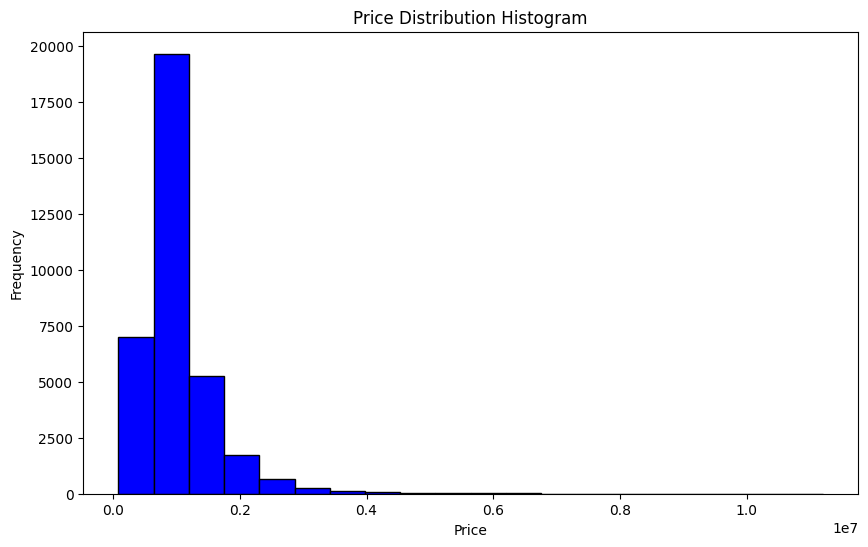

In [19]:
# We can access the 'Price' column using dataset['Price']

# Now we create a histogram
plt.figure(figsize=(10, 6))  # We can also adjust the figure size if it is needed
plt.hist(dataset['Price'], bins=20, color='blue', edgecolor='black')

# Now here we add labels and a title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution Histogram')

# Let's show the histogram
plt.show()

### 2) Draw a pair plot to see the relationship between all numerical variables and the price variable


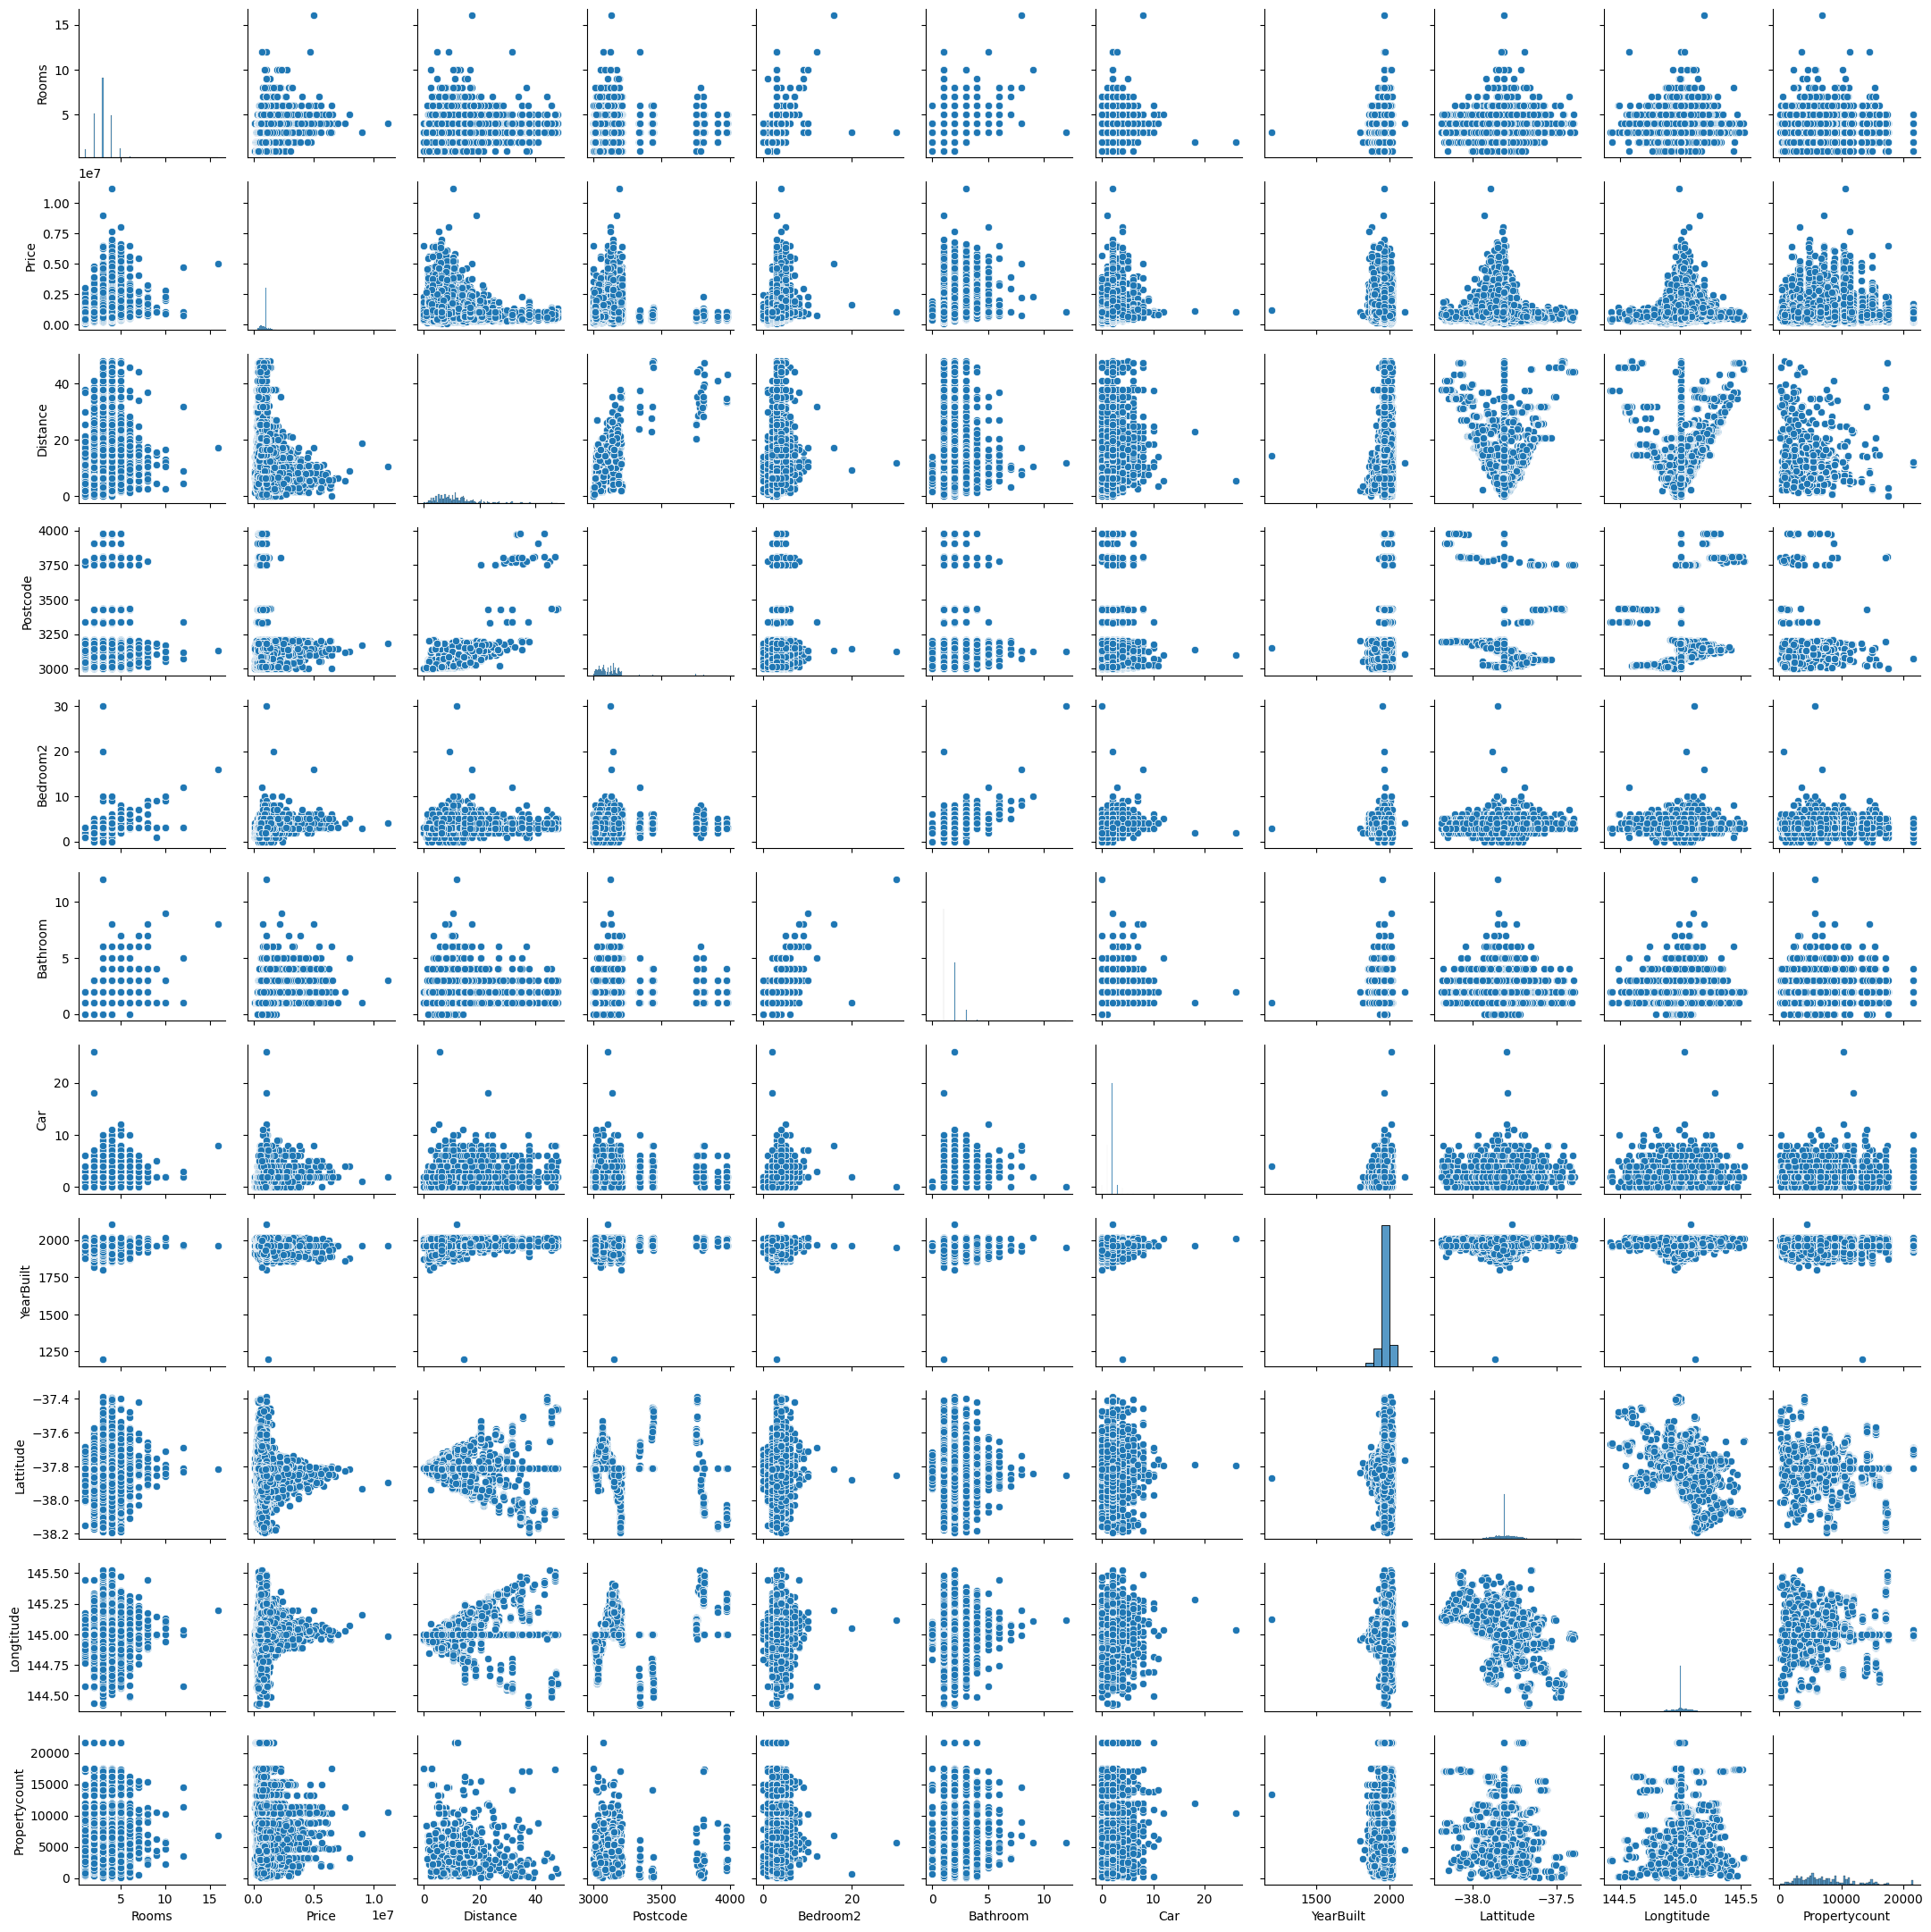

In [20]:
# We know the useful numerical variables so we are gonna use them here
numerical_columns = ['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']

# Now we create a pair plot
sb.pairplot(dataset[numerical_columns], height=2)
plt.show()

### 3) Draw a correlation matrix by using a heatmap on seaborn

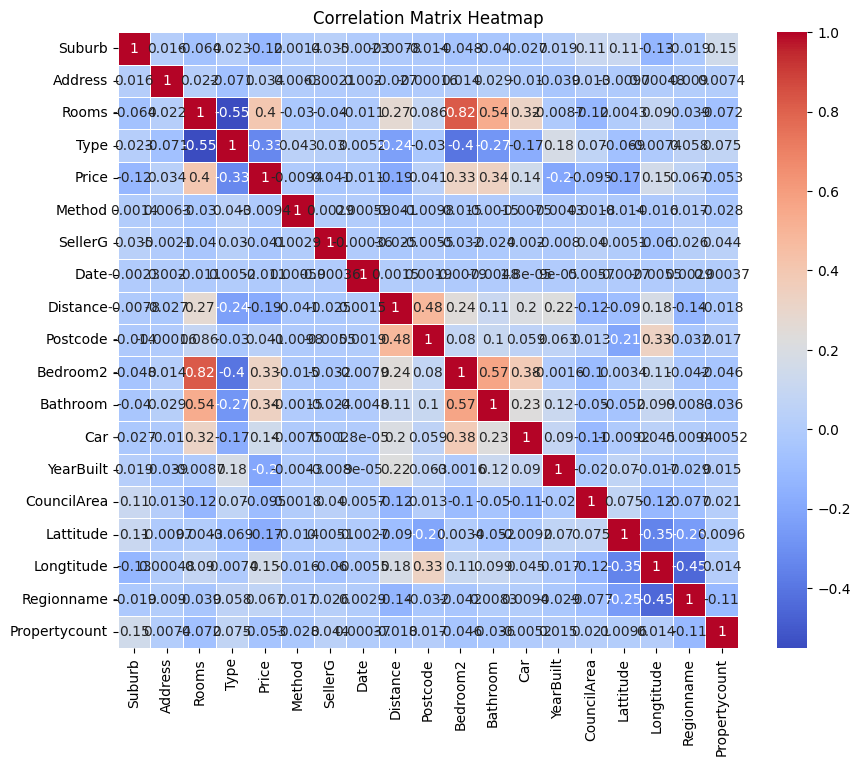

In [21]:
# First we calculate the correlation matrix
correlation_matrix = dataset.corr()

# Then we create a heatmap using Seaborn
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### 4) Implement Label Encoder and One Hot encoder for categorical variables

### Label Encoding with categorical variables

In [22]:
# We already know the categorical variables 'Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname'

categorical_columns = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']

label_encoders = {}
for column in categorical_columns:
    label_encoder = LabelEncoder()
    dataset[column + '_encoded'] = label_encoder.fit_transform(dataset[column])
    label_encoders[column] = label_encoder

### One Hot Encoding with categorical variables

In [23]:
# Checking the dataset before One Hot Encoding
print(dataset)

       Suburb  Address  Rooms  Type         Price  Method  SellerG  Date  \
0           0    29458      2     0  1.050173e+06       6      155    58   
1           0    32512      2     0  1.480000e+06       2       33    60   
2           0    15389      2     0  1.035000e+06       2       33    63   
3           0     9768      3     2  1.050173e+06       7      296    63   
4           0    25128      3     0  1.465000e+06       5       33    64   
...       ...      ...    ...   ...           ...     ...      ...   ...   
34852     348     5862      4     0  1.480000e+06       0      152    38   
34853     348    16982      2     0  8.880000e+05       5      321    38   
34854     348     7350      2     1  7.050000e+05       2      152    38   
34855     348     5421      3     0  1.140000e+06       5      370    38   
34856     348    17743      2     0  1.020000e+06       0      276    38   

       Distance  Postcode  ...  Regionname  Propertycount  Suburb_encoded  \
0         

In [24]:
data = {
    'Suburb': ['A', 'B', 'A', 'C'],
    'Address': ['Addr1', 'Addr2', 'Addr3', 'Addr4'],
    'Type': ['House', 'Apartment', 'House', 'House'],
    'Method': ['Auction', 'Private Sale', 'Auction', 'Private Sale'],
    'SellerG': ['Seller1', 'Seller2', 'Seller1', 'Seller3'],
    'Date': ['2022-01-01', '2022-02-01', '2022-01-15', '2022-03-01'],
    'CouncilArea': ['Council1', 'Council2', 'Council1', 'Council3'],
    'Regionname': ['Region1', 'Region2', 'Region1', 'Region3']
}

dataset_encoded = pd.DataFrame(data)

# Specify the categorical columns
categorical_columns = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']

# Perform one-hot encoding using pd.get_dummies
encoded_df = pd.get_dummies(dataset_encoded, columns=categorical_columns, drop_first=True)

# Display the resulting DataFrame with one-hot encoded columns
print(encoded_df)

   Suburb_B  Suburb_C  Address_Addr2  Address_Addr3  Address_Addr4  \
0         0         0              0              0              0   
1         1         0              1              0              0   
2         0         0              0              1              0   
3         0         1              0              0              1   

   Type_House  Method_Private Sale  SellerG_Seller2  SellerG_Seller3  \
0           1                    0                0                0   
1           0                    1                1                0   
2           1                    0                0                0   
3           1                    1                0                1   

   Date_2022-01-15  Date_2022-02-01  Date_2022-03-01  CouncilArea_Council2  \
0                0                0                0                     0   
1                0                1                0                     1   
2                1                0                0  

In [25]:
print(dataset)

       Suburb  Address  Rooms  Type         Price  Method  SellerG  Date  \
0           0    29458      2     0  1.050173e+06       6      155    58   
1           0    32512      2     0  1.480000e+06       2       33    60   
2           0    15389      2     0  1.035000e+06       2       33    63   
3           0     9768      3     2  1.050173e+06       7      296    63   
4           0    25128      3     0  1.465000e+06       5       33    64   
...       ...      ...    ...   ...           ...     ...      ...   ...   
34852     348     5862      4     0  1.480000e+06       0      152    38   
34853     348    16982      2     0  8.880000e+05       5      321    38   
34854     348     7350      2     1  7.050000e+05       2      152    38   
34855     348     5421      3     0  1.140000e+06       5      370    38   
34856     348    17743      2     0  1.020000e+06       0      276    38   

       Distance  Postcode  ...  Regionname  Propertycount  Suburb_encoded  \
0         

In [26]:
# Checking the dataset after One Hot Encoding
print(encoded_df)

   Suburb_B  Suburb_C  Address_Addr2  Address_Addr3  Address_Addr4  \
0         0         0              0              0              0   
1         1         0              1              0              0   
2         0         0              0              1              0   
3         0         1              0              0              1   

   Type_House  Method_Private Sale  SellerG_Seller2  SellerG_Seller3  \
0           1                    0                0                0   
1           0                    1                1                0   
2           1                    0                0                0   
3           1                    1                0                1   

   Date_2022-01-15  Date_2022-02-01  Date_2022-03-01  CouncilArea_Council2  \
0                0                0                0                     0   
1                0                1                0                     1   
2                1                0                0  

## Model Selection
## ( Model Seçimi )

In [27]:
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Regionname,Propertycount,Suburb_encoded,Address_encoded,Type_encoded,Method_encoded,SellerG_encoded,Date_encoded,CouncilArea_encoded,Regionname_encoded
0,0,29458,2,0,1.050173e+06,6,155,58,2.5,3067.0,...,2,4019.0,0,29458,0,6,155,58,31,2
1,0,32512,2,0,1.480000e+06,2,33,60,2.5,3067.0,...,2,4019.0,0,32512,0,2,33,60,31,2
2,0,15389,2,0,1.035000e+06,2,33,63,2.5,3067.0,...,2,4019.0,0,15389,0,2,33,63,31,2
3,0,9768,3,2,1.050173e+06,7,296,63,2.5,3067.0,...,2,4019.0,0,9768,2,7,296,63,31,2
4,0,25128,3,0,1.465000e+06,5,33,64,2.5,3067.0,...,2,4019.0,0,25128,0,5,33,64,31,2


In [28]:
encoded_df.head()

,Suburb_B,Suburb_C,Address_Addr2,Address_Addr3,Address_Addr4,Type_House,Method_Private Sale,SellerG_Seller2,SellerG_Seller3,Date_2022-01-15,Date_2022-02-01,Date_2022-03-01,CouncilArea_Council2,CouncilArea_Council3,Regionname_Region2,Regionname_Region3
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0
2,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,1,1,1,0,1,0,0,1,0,1,0,1


In [29]:
y = dataset['Price']
x = dataset.drop('Price', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)

In [30]:
print("Shape of x_train is {}".format(x_train.shape))
print("Shape of x_test is {}".format(x_test.shape))
print("Shape of y_train is {}".format(y_train.shape))
print("Shape of y_test is {}".format(y_test.shape))

Shape of x_train is (31371, 26)
Shape of x_test is (3486, 26)
Shape of y_train is (31371,)
Shape of y_test is (3486,)


## Use of models
## ( Modellerin kullanımı )

### 1) Lasso Model

In [31]:
# Create lasso model
lasso_model = Lasso()

# Fit the model to training data
lasso_model.fit(x_train, y_train)

# Make predictions on the test data
y_predict = lasso_model.predict(x_test)

# Calculate the "mean squared error"
mse = mean_squared_error(y_test, y_predict)

# Print the mean squared error
print(mse)

178933035603.95627


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.049e+15, tolerance: 1.018e+12
  model = cd_fast.enet_coordinate_descent(


### 2 ) Linear Regression Model
### Coefficients, Intercept, MSE(again), R-squared (R2) Score

In [34]:
# Also we can check how many features does x have with this code to make sure

num_features = x.shape[1]  # This will give us the number of features (columns)
print("Number of features:", num_features)

Number of features: 26


In [42]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model's coefficients and evaluation metrics
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Coefficients: [-1.64247220e+02 -1.73295969e-01  1.83616246e+05 -7.23564408e+04
 -9.56933355e+02 -5.15716232e+01 -9.94462182e+01 -3.49606376e+04
  7.47844739e+02 -3.42588074e+04  1.23422955e+05  3.96003054e+04
 -2.03836017e+03 -1.63886739e+03 -8.90816070e+05  5.34945727e+05
  5.81912252e+03 -7.24521941e-01 -1.64247219e+02 -1.73296232e-01
 -7.23564408e+04 -9.56933355e+02 -5.15716232e+01 -9.94462182e+01
 -1.63886739e+03  5.81912252e+03]
Intercept: -108659797.89804721
Mean Squared Error (MSE): 178932965075.16574
R-squared (R2) Score: 0.3943917829848933


In [40]:
# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(x, y)

# Make predictions
x_new = np.random.rand(1, 26)  # New input data for prediction (1 sample)
predicted_y = model.predict(x_new)

# Print the coefficients and the prediction
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Predicted value for the new data:", predicted_y)

Coefficients: [-1.53624983e+02 -1.45704057e-01  1.84712856e+05 -7.21955917e+04
 -1.14517732e+03 -5.39987121e+01 -7.41649637e+01 -3.50411029e+04
  7.39992747e+02 -3.40559313e+04  1.21084596e+05  4.01013545e+04
 -2.03028234e+03 -1.61542235e+03 -8.87596550e+05  5.42560900e+05
  5.79125124e+03 -7.33253773e-01 -1.53624983e+02 -1.45704134e-01
 -7.21955917e+04 -1.14517732e+03 -5.39987121e+01 -7.41649637e+01
 -1.61542235e+03  5.79125124e+03]
Intercept: -109640137.48149133
Predicted value for the new data: [-1.10262655e+08]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### 3) Ridge Model

In [44]:
# We can create a Ridge Regression model
alpha = 1.0  # Regularization strength (we adjust as needed)
model = Ridge(alpha=alpha)

# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Now we evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model's coefficients and evaluation metrics
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)
print("Mean Squared Error: ", mse)
print("R-squared (R2) Score: ", r2)

Coefficients:  [-1.64470924e+02 -1.73443300e-01  1.83601113e+05 -7.23276856e+04
 -9.56210223e+02 -5.15848013e+01 -9.94548935e+01 -3.49558639e+04
  7.48579913e+02 -3.42519372e+04  1.23459030e+05  3.95954312e+04
 -2.04033004e+03 -1.64004111e+03 -8.85732127e+05  5.34714575e+05
  5.84105561e+03 -7.22089906e-01 -1.64470944e+02 -1.72545427e-01
 -7.23276856e+04 -9.56210223e+02 -5.15847945e+01 -9.94548923e+01
 -1.64004111e+03  5.84105561e+03]
Intercept:  -108432656.33025816
Mean Squared Error:  178933761276.67072
R-squared (R2) Score:  0.39438908819819696


### 4 ) Elastic Net Model

In [46]:
# Create an Elastic Net Regression model
alpha = 1.0  # Regularization strength (adjust as needed)
l1_ratio = 0.5  # Mix of L1 (Lasso) and L2 (Ridge) regularization
model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model's coefficients and evaluation metrics
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)
print("Mean Squared Error: ", mse)
print("R-squared (R2) Score: ", r2)

Coefficients:  [-6.28904271e+02  1.71990071e+00  1.01127859e+05 -5.85278219e+04
 -1.24442259e+03 -1.28968264e+02 -1.46375754e+02 -3.20295377e+04
  1.02118487e+03  4.45099136e+04  7.11939653e+04  2.95553255e+04
 -2.51588425e+03 -2.43415055e+03 -1.25726676e+04  1.30932917e+04
  3.82726521e+03 -1.48732617e+00  1.38118462e+02 -1.59469701e+00
 -5.85276977e+04 -1.24442457e+03 -9.28887824e+00 -1.06022626e+02
 -2.42482215e+03  3.82698711e+03]
Intercept:  430305.360721927
Mean Squared Error:  193026990990.80383
R-squared (R2) Score:  0.3466897963680128


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.521e+15, tolerance: 1.018e+12
  model = cd_fast.enet_coordinate_descent(


### 5 ) K-Nearest Neighbors Regressor Model

In [48]:
# Create a K-Nearest Neighbors Regressor model
k = 5  # Number of neighbors (adjust as needed)
model = KNeighborsRegressor(n_neighbors=k)

# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error: ", mse)
print("R-squared (R2) Score: ", r2)

Mean Squared Error:  272099852343.0317
R-squared (R2) Score:  0.07906345620375554


### 6 ) Random Forest Regressor Model

In [50]:
# Create a Random Forest Regressor model
n_estimators = 100  # Number of trees in the forest (adjust as needed)
model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)

# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error: ", mse)
print("R-squared (R2) Score: ", r2)

Mean Squared Error:  135747134719.18259
R-squared (R2) Score:  0.5405565420119247


### 7 ) Gradient Boosting Regressor Model

In [53]:
# Create a Gradient Boosting Regressor model
n_estimators = 100  # Number of boosting stages (adjust as needed)
learning_rate = 0.1  # Step size shrinks the contribution of each estimator (adjust as needed)
model = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)

# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error: ", mse)
print("R-squared (R2) Score: ", r2)

Mean Squared Error:  141713613335.54593
R-squared (R2) Score:  0.5203626751344788


### 8 ) Ada Boost Regressor Model

In [55]:
# Create an AdaBoost Regressor model with the provided parameters from the pdf document
n_estimators = 5  # Number of boosting stages
learning_rate = 1.2  # Step size for updating the weights (learning rate)
loss = 'exponential'  # Loss function to be used
random_state = 2

# Create a Decision Tree Regressor as the weak learner
base_model = DecisionTreeRegressor(max_depth=3)  # Adjust max_depth as needed

model = AdaBoostRegressor(
    base_model,
    n_estimators=n_estimators,
    learning_rate=learning_rate,
    loss=loss,
    random_state=random_state
)

# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error: ", mse)
print("R-squared (R2) Score: ", r2)

Mean Squared Error:  202421601550.9431
R-squared (R2) Score:  0.31489323306573225


# If we compare the models, we can see that Random Forest Regressor has the highest R2 SCORE, so we choose it.